# Neural Networks with PyTorch

**Machine Learning - fall 2024**



__Notebook Author__: faeze abdoli



## Notebook Objectives

In this notebook we are going to implement and train a neural network with PyTorch!

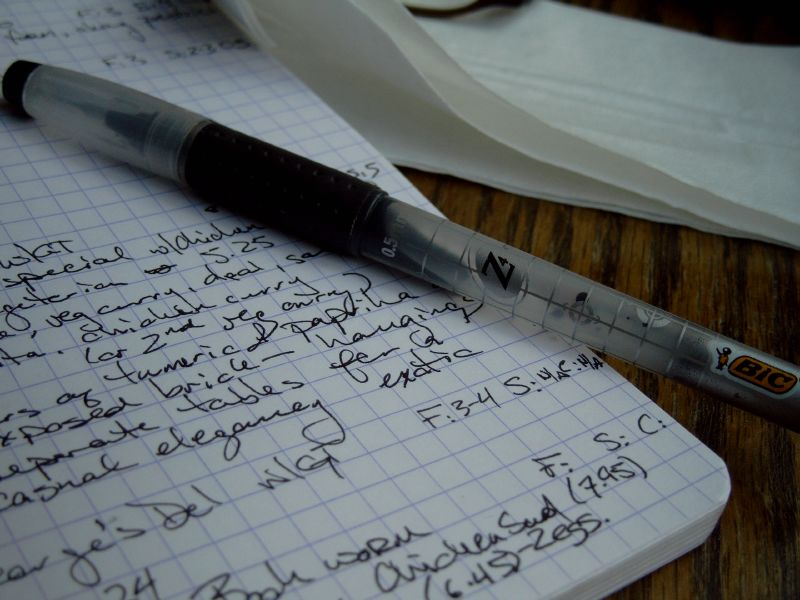

## Imports and Setup

We start by importing necessary modules. Don't worry if it seems a little overwhelming at first.😎😎

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# # @title plotting functions

# from matplotlib import pyplot as plt
# from tqdm import trange

# def visualize(images, labels):
#     """
#     Visualize a batch of images.
#     """
#     fig, axes = plt.subplots(8, 8, figsize=(10, 10))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(images[i].squeeze(), cmap='gray')
#         ax.set_title(f'Label: {labels[i].item()}')
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()


# def visualize_predictions(images, labels, predicted_labels):
#     """
#     Visualize a batch of images with their true and predicted labels.
#     Titles are green if the prediction is correct, red if incorrect.
#     """
#     fig, axes = plt.subplots(8, 8, figsize=(11, 12))
#     for i, ax in enumerate(axes.flat):
#         ax.imshow(images[i].squeeze(), cmap='gray')
#         color = 'green' if labels[i].item() == predicted_labels[i].item() else 'red'
#         ax.set_title(f'True: {labels[i].item()}\nPred: {predicted_labels[i].item()}', color=color)
#         ax.axis('off')

#     plt.tight_layout()
#     plt.show()


# def plot_conf_mat(model, dataloader, device):
#     """
#     Plot the confusion matrix for a given model and dataloader.
#     """
#     # Initialize the confusion matrix
#     total, correct = 0, 0
#     conf_mat = torch.zeros((10, 10))
#     with torch.no_grad():
#         for x, y in dataloader:
#             x, y = x.to(device), y.to(device)
#             pred = model(x)
#             total += pred.shape[0]
#             pred = torch.argmax(pred, axis=1)
#             correct += sum(pred == y).item()
#             for j in range(pred.shape[0]):
#                 conf_mat[y[j], pred[j].item()] += 1
#     # calculate the normalized confusion matrix
#     norm_conf_mat = conf_mat / torch.sum(conf_mat, axis=1)
#     # plot the matrix
#     fig, ax = plt.subplots()
#     plt.imshow(norm_conf_mat)
#     plt.title('Confusion Matrix')
#     plt.xlabel('Predictions')
#     plt.ylabel('Labels')
#     plt.xticks(range(10))
#     plt.yticks(range(10))
#     plt.colorbar()
#     # put number of each cell in plot
#     for i in range(10):
#         for j in range(10):
#             c = conf_mat[j, i]
#             color = 'black' if c > 500 else 'white'
#             ax.text(i, j, str(int(c)), va='center', ha='center', color=color)
#     plt.show()

# Dataset

We will use `datasets` from `torchvision` to load the [MNIST](https://yann.lecun.com/exdb/mnist/) handwritten digits dataset. You can find the list of datasets available on torchvision [here](https://pytorch.org/vision/0.8/datasets.html). Now let's take a loot at the parameters we set:



*   `root` sets the directory we store and load our data from.
*   `train` indicates wether we want the training dataset or the test dataset.
*   `transform` allows us to apply transformations to our data, here we are only going to convert the data to tensor so that they work with PyToch, however in the future notebooks you will see more complicated transformations.



In [ ]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=❓,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=❓,
    download=True,
    transform=ToTensor(), # Why Convert to Tensor? 👁‍🗨🧷
)


# print(f"Training data: {training_data}\n")
# print(f"Test data: {test_data}")

As you can see there are 60000 training samples in the training dataset and there are 10000 samples in the test dataset.

# Data Loaders

To make loading and working with the data easier, we are going to use `DataLoader` from `torch.utils.data`. The `DataLoader` takes in a dataset and a `batch_size` parameter, and allows us to iterate over the dataset. Here we do one iteration just to see the data shapes:

In [ ]:
batch_size = ❓

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

# Print the shape of the data to understand its dimensions and structure.  ❓🔧
''' X [N, C, H, W] ,
N is the batch size (64 in this case).
C is the number of channels (1 for grayscale images like MNIST).
H and W are the height and width of the images (28x28 pixels for MNIST).'''

As you can see the `x`s are of shape `[64, 1, 28, 28]` which means we have a batch of `64` images, each with `1` channel which means the images are grayscale (for example colorful images have 3 channels of red, blue and green or RGB), and of size `28x28` pixels.

Similarly the `y`s are of shape `[64]` which means we have a batch of 64 labels. In the next section we will learn more about these labels.

# Visualization

Here we will take a look at single batch of data and visualize it.

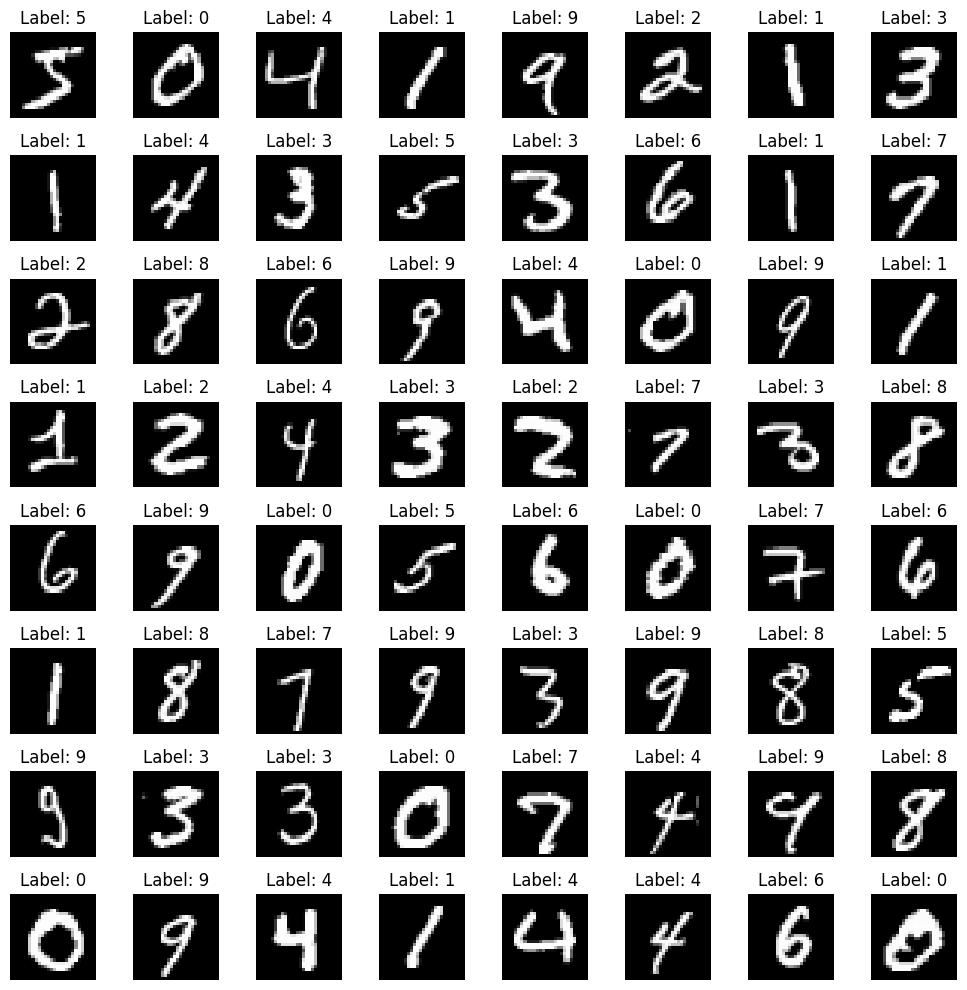

In [ ]:
# Write code below to display single batch of data  📉📊


# Device

To accelerate operations in the neural network, we move it to the GPU or MPS (for Apple silicon) if available.

In [ ]:
# Get cpu, gpu or mps device for training.❓❓


Using cuda device


# Model

Here we define our model. Recall that each batch of image has a shape of `[64, 1, 28, 28]`. For now we only want to use `Linear` layers so we must **flatten** the inputs so that we can pass it to the linear layers. The `nn.Flatten()` module allows us to do this.

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        # Can you pass a tensor with shape (1, 28, 28) to a linear layer?  If not, write the necessary code to transform this shape appropriately. 🔐💡

            nn.Linear(❓),
            #add layers
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = ❓
        return logits

Next we initialize our model.

In [ ]:
model = NeuralNetwork().to(device)
# print(model) 🌐

In [ ]:
# from torchsummary import summary

# summary(model, input_size=(1, 28, 28))  # Using (channels, height, width) for an image

In [ ]:
pip install torch torchviz graphviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=8b309a209b194dc60fdddae5ea6690d31d55bbf2df3643d6bd6fb2bf7c168a0c
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
# import torch
# import torch.nn as nn
# from torchviz import make_dot

# dot = make_dot(y, params=dict(model.named_parameters()))
# dot.render("model_architecture", format="png")  # Save the visualization as a PNG file

# Image(filename='model_architecture.png')

# Loss Function

Since we are trying to classify the handwritten digits, we are going to use the ❓. You can see the list of loss functions in PyTorch [here](https://pytorch.org/docs/stable/nn.html#loss-functions).

In [ ]:
loss_fn = nn.❓()

# Optimizer

Next we need to setup an optimizer for training our model.`. In the following sessions you will learn more about different optimizers but can also learn about the optimizers available on PyTorch [here](https://pytorch.org/docs/stable/optim.html).

In [ ]:
optimizer = torch.optim.❓(model.parameters(), lr=❓)

# Training

To train the model we first set the number of epochs. For each epoch we then iterate over the entire training data and update the model parameters. For each batch of data, we must first move the data to same device as the network, then we predict the output of the model, calculate the loss, perform backward pass, update parameters, and reset the gradients.

To monitor training, we use `trange` from `tqdm` which performs similar to `range` but allows us to have a progress bar `pbar` which lets us display useful information.

In [ ]:
# Number of epochs we wish to train the model
n_epochs = ❓

for _ in (pbar := trange(n_epochs)):
    # Iterate over the data
    for x, y in train_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Predict the output and perform the forward pass
        pred = model(❓)
        # Compute prediction error
        loss = loss_fn(❓, ❓)
        # Backpropagation
        loss.backward()
        # Update the model weights
        optimizer.step()
        # Clear the gradients
        optimizer.zero_grad()
        # Update the progress bar
        pbar.set_description(f'Loss = {loss.item():.3f}')

Loss = 1.668: 100%|██████████| 5/5 [00:55<00:00, 11.12s/it]


In the following notebooks we explore more advanced methods for monitoring the training but what you

# Evaluation

Finally we can evaluate the trained model. We will start by evaluating the model on the test dataset. Here we use `torch.no_grad()` since we don't need the gradients. We iterate over the entire test dataset and print the accuracy of our model on this dataset.

In [ ]:
# Store the number of correctly classified and total labels
correct, total = 0, 0

# Disable gradient calculation
with torch.no_grad():
    # Iterate over the test data
    for x, y in test_dataloader:
        # Move the datapoints to same device as the model
        x, y = x.to(device), y.to(device)
        # Predict the output
        logits = model(❓)
        # Get the predicted label
        pred = torch.argmax(❓, axis=1)
        # Update the number of correclty classified labels
        correct += ❓
        # Update the number of total labels
        total += pred.shape[0]




Accuracy: 72.44%


In [ ]:
'''Accuracy: The proportion of correctly classified instances.
Precision, Recall, and F1 Score: Metrics to assess the model’s performance across different classes.'''


Let's visuzlie a batch to compare the predictions and the true labels.

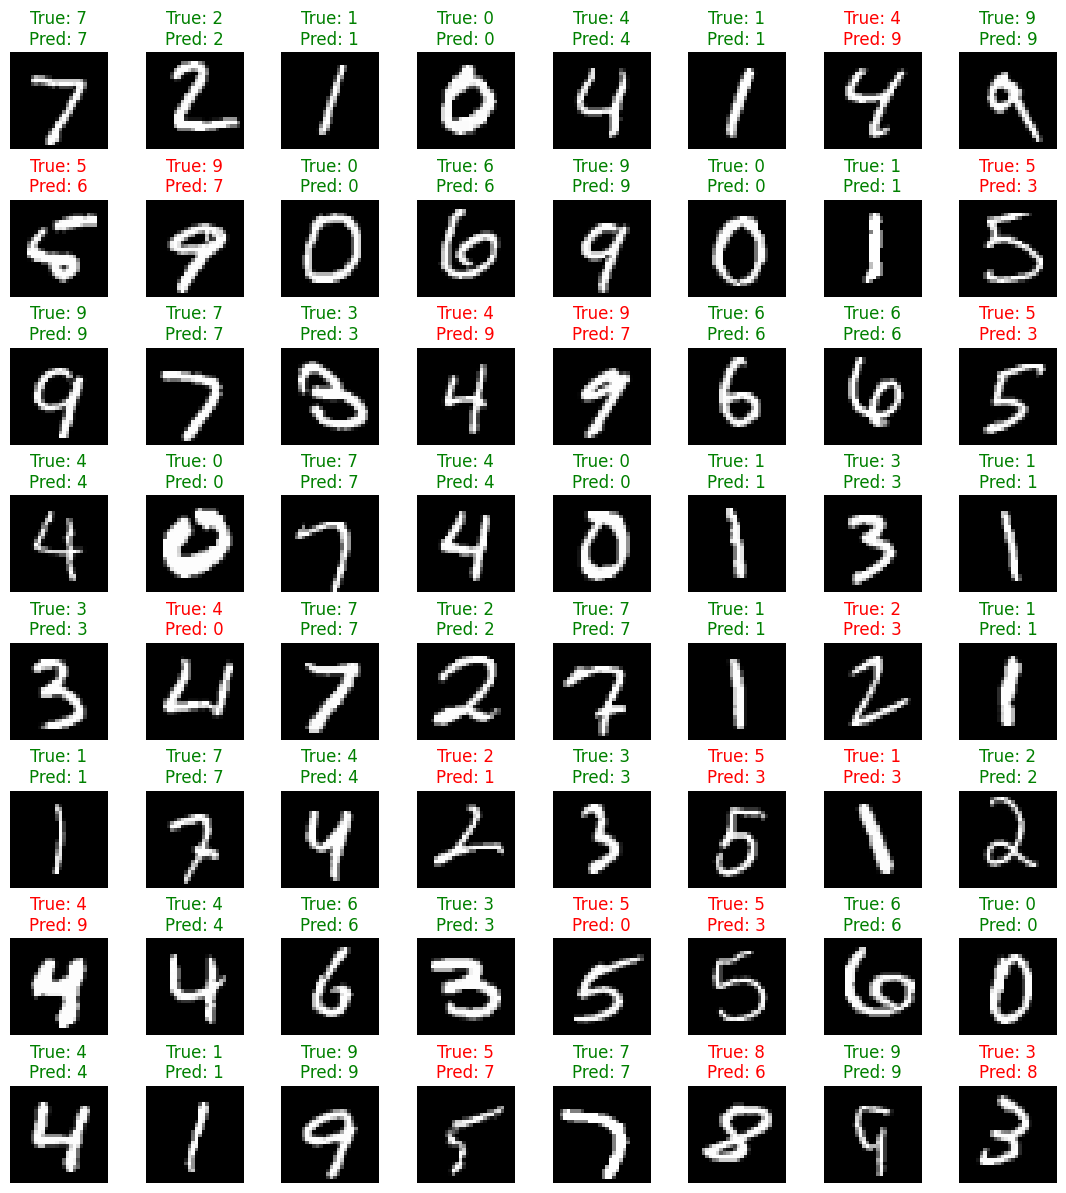

In [ ]:
# Visualize the predictions alongside the original images and their true labels. ❓


To get a better sense of our model, we can plot it's confusion matrix.

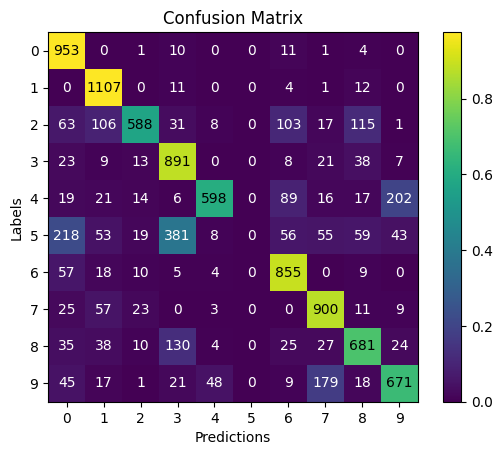

In [ ]:
# confusion matrix

# Experiments

Here we will take a look at different optimizers and how they effect training and convergence. Run the widget bellow to train the model for different optimizers! You can increase the number of epochs or set the hyperparameters of each optimizers manually if you like.

In [ ]:
# @markdown Optimizer Experimentation Widget

import ipywidgets as widgets
from IPython.display import display

train_dataloader = DataLoader(training_data, batch_size=128)

def train_model(model, optimizer, n_epochs=10):
    losses, accuracies = [], []
    for _ in (pbar := trange(n_epochs)):
        running_loss, acc = 0, 0
        for x, y in train_dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            running_loss += loss.item()
            pred = torch.argmax(pred, axis=1)
            acc += sum(pred == y).item()
        acc /= len(train_dataloader.dataset)
        acc *= 100
        running_loss /= len(train_dataloader)
        losses.append(running_loss)
        accuracies.append(acc)
        pbar.set_description(f'Loss = {running_loss:.3f} | Accuracy = {acc:.2f}% ')
    return losses, accuracies


def plot_losses_accuracies(results):
    fig, axes = plt.subplots(1, 2)
    for optimizer, res in results.items():
        if 'losses' not in res or 'accuracies' not in res:
            continue
        losses = res['losses']
        accuracies = res['accuracies']
        axes[0].plot(losses, label=optimizer)
        axes[1].plot(accuracies, label=optimizer)
    axes[0].set_title('Losses')
    axes[1].set_title('Accuracies')
    axes[0].legend()
    axes[1].legend()
    fig.set_size_inches(12, 6)
    plt.show()


# Create a list of values
options = ['SGD', 'AdaGrad', 'RMSProp', 'Adam']

# Create a dropdown widget with custom layout
dropdown = widgets.Dropdown(
    options=options,
    description='Optimizer:',
    layout={'width': '200px'},
    style={'description_width': 'initial'}

)

# Define a function to run based on selected value
def on_value_change(change):
    optimizer = change['new']
    global first_run, resuts
    model = NeuralNetwork().to(device)
    if results[optimizer] != {}:
        losses = results[optimizer]['losses']
        accuracies = results[optimizer]['accuracies']
        plot_losses_accuracies(results)
        return
    if optimizer == 'SGD':
        opt = torch.optim.SGD(model.parameters(), lr=1e-3)
    elif optimizer == 'AdaGrad':
        opt = torch.optim.Adagrad(model.parameters(), lr=1e-3)
    elif optimizer == 'RMSProp':
        opt = torch.optim.RMSprop(model.parameters(), lr=1e-3)
    elif optimizer == 'Adam':
        opt = torch.optim.Adam(model.parameters(), lr=1e-3)
    print(f'\n{optimizer}')
    losses, accuracies = train_model(model, opt)
    results[optimizer]['losses'] = losses
    results[optimizer]['accuracies'] = accuracies
    plot_losses_accuracies(results)



# Observe changes in the dropdown value
dropdown.observe(on_value_change, names='value')

results = {optimizer: dict() for optimizer in options}

# on_value_change({"new": 'SGD'})

# Display the widget
display(dropdown)


Dropdown(description='Optimizer:', layout=Layout(width='200px'), options=('SGD', 'AdaGrad', 'RMSProp', 'Adam')…

# Refrences


*   [Learn the Basics of PyTorch](https://pytorch.org/tutorials/beginner/basics/intro.html)
*   [Neural networks](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) from [3Blue1Brown](https://www.3blue1brown.com/)

